<a href="https://colab.research.google.com/github/DeanPhillipsOKC/keras-notes/blob/master/Keras_Syntax_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns

# Keras Syntax Basics

## Preparing the Data

### Read in the Source Data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/DeanPhillipsOKC/machine-learning-samle-data/master/fake_reg.csv')

In [96]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


### Peform some quick analysis of the data

* Since it's a small data set, I've used a pair plot
* Note the high correlation between feature 2 and price

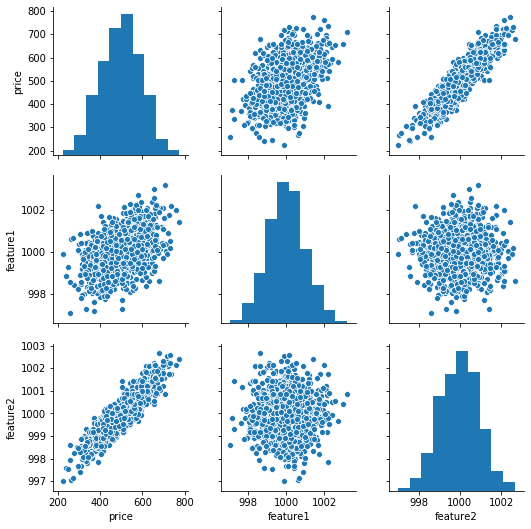

In [97]:
sns.pairplot(df)

### Train the model using scikit learn's train_test_split

In [0]:
from sklearn.model_selection import train_test_split

Since tensorflow requires numpy arrays instead of pandas data frames, we need to use the .values.

Since X is a two dimensional array, we use a capital by convension

In [0]:
X = df[['feature1', 'feature2']].values

In [0]:
y = df['price'].values

test_size represents the size of our randomized data.  In this case it will be 30% of the total source data size.

random_state is similar to a seed.  It is an arbitrary number, but specifying it will ensure that you always get the same random data.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [102]:
X_train.shape

(700, 2)

In [103]:
X_test.shape

(300, 2)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [105]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  The transformation is calculated as::
 |  
 |      X_scaled = scale * X + min - X.min(axis=0) * scale
 |      where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), de

In [0]:
scaler = MinMaxScaler()

Compute the min, max, and stddev values so that the transformation has the data it needs to do its thing

We will NOT fit the test data set because that would essentially cheat by ascertaning information about the test data set.

In [107]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

Perform the transformation of the training data.


In [0]:
X_train = scaler.transform(X_train)

In [0]:
X_test = scaler.transform(X_test)

In [110]:
X_train.max()

1.0

In [111]:
X_train.min()

0.0

In [112]:
X_test.max()

1.0186515935232023

In [113]:
X_test.min()

-0.014108392024496652

## Creating and Training the Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Build the NN model

* Consists of three layers
* Layers 1-3 consist of 4 densely connected neurons with a rectified linear unit activation function
* The final layer consists of a single neuron with no activation function

In [0]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

### Compile the NN model

The values for optimizer and loss function were chosen because of the kind of problem that our NN is trying to solve.  Since it's a regression problem with a continuous y value, we want to use mean square error

In [0]:
model.compile(optimizer='rmsprop', loss='mse')

### Fitting the model
We pass in our training data, and for now pick an arbitrary number for epochs

Epochs represent the number of times that we go through our training data set completely.

In [117]:
model.fit(X_train, y_train, epochs=250, verbose=1)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 0s 319us/sample - loss: 256698.0108
Epoch 2/250
700/700 [==============================] - 0s 43us/sample - loss: 256647.6075
Epoch 3/250
700/700 [==============================] - 0s 40us/sample - loss: 256592.7770
Epoch 4/250
700/700 [==============================] - 0s 42us/sample - loss: 256529.4350
Epoch 5/250
700/700 [==============================] - 0s 50us/sample - loss: 256457.2223
Epoch 6/250
700/700 [==============================] - 0s 61us/sample - loss: 256375.4816
Epoch 7/250
700/700 [==============================] - 0s 47us/sample - loss: 256283.6129
Epoch 8/250
700/700 [==============================] - 0s 42us/sample - loss: 256180.9802
Epoch 9/250
700/700 [==============================] - 0s 51us/sample - loss: 256066.4755
Epoch 10/250
700/700 [==============================] - 0s 48us/sample - loss: 255939.6231
Epoch 11/250
700/700 [==============================] - 0s 41us/sample - loss

### Visualizing the history of the model training session

model.history.history returns a single dimensional array whos index represents the epoch, and value represents the loss

In [118]:
model.history.history

{'loss': [256698.01080357144,
  256647.6075,
  256592.7769642857,
  256529.435,
  256457.22232142856,
  256375.48160714286,
  256283.61285714287,
  256180.98017857142,
  256066.47553571427,
  255939.623125,
  255799.7507142857,
  255645.84267857144,
  255477.2575,
  255292.95,
  255092.44133928572,
  254874.8717857143,
  254638.32098214285,
  254382.8442857143,
  254107.15160714285,
  253811.06526785714,
  253491.38169642858,
  253149.10107142857,
  252782.71776785713,
  252392.28642857142,
  251974.99633928572,
  251530.34580357143,
  251055.64901785715,
  250553.59419642857,
  250017.14821428573,
  249453.1207142857,
  248855.38553571427,
  248219.81294642857,
  247554.9504464286,
  246850.4613392857,
  246107.82705357144,
  245329.54357142857,
  244507.968125,
  243646.07973214285,
  242742.45928571429,
  241798.39473214286,
  240808.46294642857,
  239767.07017857142,
  238682.861875,
  237554.72982142857,
  236375.14482142858,
  235139.94089285715,
  233854.62348214287,
  232519.69

We can create a dataframe using the history data

In [119]:
pd.DataFrame(model.history.history)

,loss
0,256698.010804
1,256647.607500
2,256592.776964
3,256529.435000
4,256457.222321
...,...
245,444.306467
246,428.409688
247,416.630150
248,403.194057


The DataFrame can be plotted using pandas builtin plot function

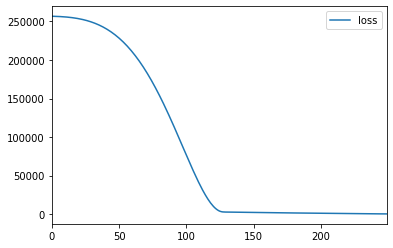

In [120]:
pd.DataFrame(model.history.history).plot()

## Model Evaluation

### View the loss of the test, and training set (mean squared error)

In [121]:
model.evaluate(X_test, y_test, verbose=0)

369.0542704264323

In [122]:
model.evaluate(X_train, y_train, verbose=0)

380.4851402064732

### Get our predictions based on the model

In [0]:
test_predictions = model.predict(X_test)

Show the list of predictions of price given the test data set

In [124]:
test_predictions.shape

(300, 1)

Convert to a Pandas sereis

In [0]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [126]:
test_predictions

0      426.179108
1      602.601929
2      579.162537
3      556.672729
4      386.404327
          ...    
295    522.418152
296    501.233734
297    592.340698
298    439.610138
299    427.434601
Length: 300, dtype: float32

In [0]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [0]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [0]:
pred_df.columns = ['Test True Y', 'Model Prediction']

In [130]:
pred_df

,Test True Y,Model Prediction
0,402.296319,426.179108
1,624.156198,602.601929
2,582.455066,579.162537
3,578.588606,556.672729
4,371.224104,386.404327
...,...,...
295,525.704657,522.418152
296,502.909473,501.233734
297,612.727910,592.340698
298,417.569725,439.610138


### Visualizing the performance of the model.

Here we see that there is a pretty good correlation between the predicted and actual values

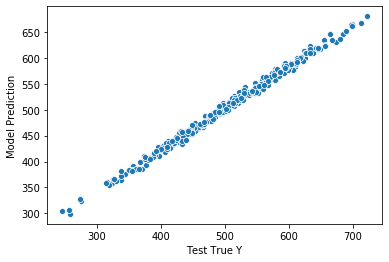

In [131]:
sns.scatterplot(x='Test True Y', y='Model Prediction', data=pred_df)

### Evaluating the model's performance using statistics

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

We can use SciKit Learn's mean_absolute_error function which shows that we are off by about four dollars

In [133]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Prediction'])

15.179563110228203

To figure out if this is an acceptable amount it is helpful to compare it to the mean of the dataset.

In this case the average price is 498 meaning we more than 99% accurate which seems like a pretty good model

In [134]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


### Using the model on new data

Pretend we found a gem and feature1 is 998, and feature2 is 100

In [0]:
new_gem = [[998, 1000]]

Before we can use our model we need to transform it using the scaler that we used to transform our training, and test data

In [136]:
new_gem = scaler.transform(new_gem)
new_gem

array([[0.14117652, 0.53968792]])

In [137]:
model.predict(new_gem)

array([[429.905]], dtype=float32)

### Saving the model

In [0]:
from tensorflow.keras.models import load_model

In [0]:
model.save('my_gem_model.h5')

In [140]:
later_model = load_model('my_gem_model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [141]:
later_model.predict(new_gem)

array([[429.905]], dtype=float32)